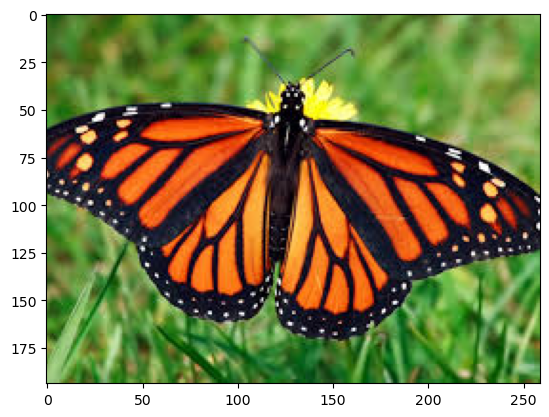

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread('monarch.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [23]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

In [25]:
from sklearn.cluster import DBSCAN

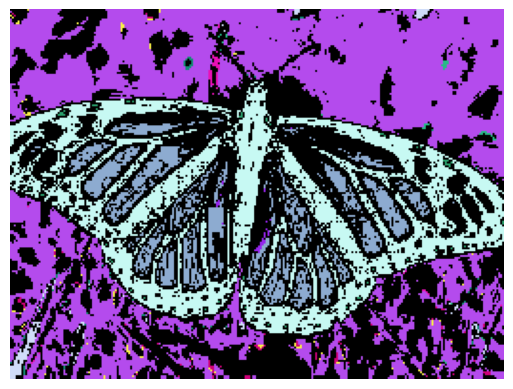

In [54]:
# Perform DBSCAN clustering
eps = 5  # The maximum distance between two samples to be considered in the same neighborhood
min_samples = 50  # The minimum number of points needed to form a cluster

clustering = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(pixel_vals)
labels = clustering.labels_

# Get unique labels and assign random colors to each cluster
unique_labels = np.unique(labels)
colors = np.random.randint(0, 255, size=(len(unique_labels), 3), dtype=np.uint8)
segmented_data = np.array([colors[label] if label != -1 else [0, 0, 0] for label in labels])  # Noise as black

# Reshape back to original image dimensions
segmented_image = segmented_data.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_image)
plt.axis('off')
plt.show()